In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [ ]:
# import data
def get_data(stocks, start, end):
  stockData = yf.download(stocks, start, end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix

In [ ]:
stockList = ['NVDA', 'AAPL', 'MSFT', 'GOOGL', 'EA', 'AMD']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [ ]:
meanReturns, covMatrix = get_data(stockList, startDate, endDate)
print(meanReturns)
print(covMatrix)

/tmp/ipython-input-3387846347.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download(stocks, start, end)
[*********************100%***********************]  6 of 6 completed

Ticker
AAPL     0.000188
AMD      0.001013
EA       0.000953
GOOGL    0.001110
MSFT     0.000931
NVDA     0.001809
dtype: float64
Ticker      AAPL       AMD        EA     GOOGL      MSFT      NVDA
Ticker                                                            
AAPL    0.000466  0.000415  0.000070  0.000226  0.000197  0.000331
AMD     0.000415  0.001131  0.000088  0.000414  0.000310  0.000759
EA      0.000070  0.000088  0.000404  0.000032  0.000047  0.000079
GOOGL   0.000226  0.000414  0.000032  0.000432  0.000187  0.000367
MSFT    0.000197  0.000310  0.000047  0.000187  0.000280  0.000363
NVDA    0.000331  0.000759  0.000079  0.000367  0.000363  0.001103


In [ ]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.05262402 0.20704182 0.20829149 0.19268444 0.24960755 0.08975068]


In [ ]:
# Monte Carlo Method
# number of simulations
mc_sims = 100
T = 100 # timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0)

initPortfolio = 10000

for m in range(0, mc_sims):
  # Assuming returns distributions are a Multivariate Normal Distribution
  Z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)           # Lower Triangular Matrix using Cholesky Decomposition
  dailyReturns = meanM + np.inner(L, Z)
  portfolio_sims[:, m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initPortfolio

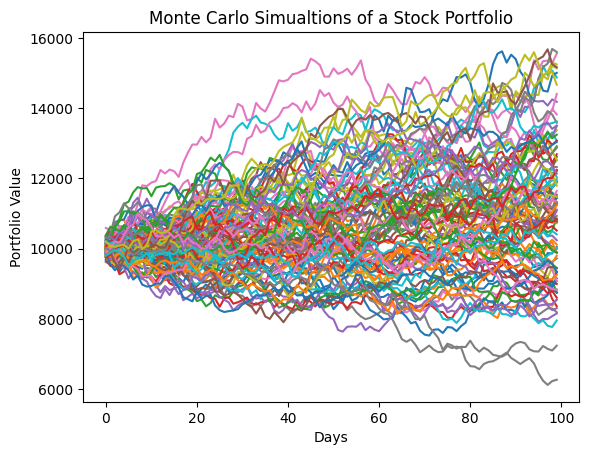

In [ ]:
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value")
plt.xlabel("Days")
plt.title("Monte Carlo Simualtions of a Stock Portfolio")
plt.show()